In [ ]:
# Ref: https://colab.research.google.com/notebooks/snippets/drive.ipynb
# Import PyDrive and associated libraries
# This only needs to be done once in a notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once in a notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download zip file based on its file ID
file_id = '14pJ1ADnQ0lJO8223Tv_mxUuZKc6llp5f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('dataset.zip')

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('dataset.zip', 'r')

zip_ref.extractall('./data')
zip_ref.close()

In [ ]:
import os

# Define training directories
source_path = './data'

# List of plant names
plant_names = ['alang_alang', 'andong', 'jambu_biji', 'jarong', 'kumis_kucing', 'kunyit',
               'lengkuas', 'lidah_buaya', 'mengkudu', 'pacar_air', 'saga', 'sambiloto',
               'seledri', 'serai', 'sirih']

# Create a dictionary to store the source paths
source_paths = {}

# Loop through each plant name and create the corresponding source path
for plant_name in plant_names:
    source_paths[plant_name] = os.path.join(source_path, plant_name)


In [ ]:
from pathlib import Path
import imghdr
import os

source_path = './data'

# List of valid image extensions
img_extensions = ['.png', '.jpg', '.jpeg']

# List of valid image types
valid_img_type = ['jpeg', 'png', 'gif', 'bmp']

# Iterate through all files in the source path
for file_name in Path(source_path).rglob('*'):
    # Check if the file has a valid image extension
    if file_name.suffix.lower() in img_extensions:
        # Determine the image type using imghdr
        img_type = imghdr.what(file_name)

        # Check if the image type is None (invalid)
        if img_type is None:
            print(f'{file_name} type is none')
            os.remove(file_name)

        # Check if the image type is not in the valid types
        elif img_type not in valid_img_type:
            print(f'{file_name} is a {img_type}, not valid')
            os.remove(file_name)


data/kunyit/00000651.jpg is a webp, not valid
data/kunyit/00000360.jpg type is none
data/kunyit/00000350.jpg type is none
data/kunyit/00000626.jpg type is none
data/kunyit/00000593.jpg type is none
data/kunyit/00000478.jpg is a webp, not valid
data/kunyit/00000124.jpg type is none
data/kunyit/00000596.jpg is a webp, not valid
data/kunyit/00000586.jpg is a webp, not valid
data/kunyit/00000387.jpg is a webp, not valid
data/kunyit/00000076.jpg type is none
data/kunyit/00000464.jpg is a webp, not valid
data/kunyit/00000369.jpg is a webp, not valid
data/kunyit/00000453.jpg type is none
data/kunyit/00000461.jpg type is none
data/kunyit/00000391.jpg type is none
data/kunyit/00000584.jpg is a webp, not valid
data/kunyit/00000580.jpg is a webp, not valid
data/kunyit/00000172.jpg is a webp, not valid
data/kunyit/00000031.jpg type is none
data/kunyit/00000422.jpg type is none
data/kunyit/00000486.jpg is a webp, not valid
data/kunyit/00000209.jpg type is none
data/kunyit/00000456.jpg type is none


In [ ]:
import os

source_path = './data'

directories = {
    'alang-alang': source_path_alangalang,
    'andong': source_path_andong,
    'jambu biji': source_path_jambubiji,
    'jarong': source_path_jarong,
    'kumis kucing': source_path_kumiskucing,
    'kunyit': source_path_kunyit,
    'lengkuas': source_path_lengkuas,
    'lidah buaya': source_path_lidahbuaya,
    'mengkudu': source_path_mengkudu,
    'pacar air': source_path_pacarair,
    'saga': source_path_saga,
    'sambiloto': source_path_sambiloto,
    'seledri': source_path_seledri,
    'serai': source_path_serai,
    'sirih': source_path_sirih
}

# Iterate through each directory and get the total number of images
for label, path in directories.items():
    num_images = len(os.listdir(path))
    print(f"Total {label} images: {num_images}")


Total alang-alang images: 340
Total andong images: 205
Total jambu biji images: 343
Total jarong images: 214
Total kumis kucing images: 333
Total kunyit images: 346
Total lengkuas images: 314
Total lidah buaya images: 265
Total mengkudu images: 289
Total pacar air images: 338
Total saga images: 223
Total sambiloto images: 198
Total seledri images: 362
Total serai images: 292
Total sirih images: 331


In [ ]:
import os

# Define root directory
root_dir = '/tmp/medicinal-plants'

# Create training and validation directories
def create_train_val_dirs(root_path):
    train_dir = os.path.join(root_dir, 'training')
    val_dir = os.path.join(root_dir, 'validation')

    directories = ['alang_alang', 'andong', 'jambu_biji', 'jarong', 'kumis_kucing', 'kunyit',
                   'lengkuas', 'lidah_buaya', 'mengkudu', 'pacar_air', 'saga', 'sambiloto',
                   'seledri', 'serai', 'sirih']

    for directory in directories:
        train_subdir = os.path.join(train_dir, directory)
        val_subdir = os.path.join(val_dir, directory)
        os.makedirs(train_subdir, exist_ok=True)
        os.makedirs(val_subdir, exist_ok=True)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")


In [ ]:
import os

# Define root directory
root_dir = '/tmp/medicinal-plants'

# Test create_train_val_dirs function
def print_subdirectories(root_dir):
    for rootdir, dirs, files in os.walk(root_dir):
        for subdir in dirs:
            print(os.path.join(rootdir, subdir))

print_subdirectories(root_dir)


/tmp/medicinal-plants/training
/tmp/medicinal-plants/validation
/tmp/medicinal-plants/training/kunyit
/tmp/medicinal-plants/training/sambiloto
/tmp/medicinal-plants/training/alang_alang
/tmp/medicinal-plants/training/seledri
/tmp/medicinal-plants/training/andong
/tmp/medicinal-plants/training/jambu_biji
/tmp/medicinal-plants/training/pacar_air
/tmp/medicinal-plants/training/mengkudu
/tmp/medicinal-plants/training/serai
/tmp/medicinal-plants/training/kumis_kucing
/tmp/medicinal-plants/training/lidah_buaya
/tmp/medicinal-plants/training/lengkuas
/tmp/medicinal-plants/training/jarong
/tmp/medicinal-plants/training/sirih
/tmp/medicinal-plants/training/saga
/tmp/medicinal-plants/validation/kunyit
/tmp/medicinal-plants/validation/sambiloto
/tmp/medicinal-plants/validation/alang_alang
/tmp/medicinal-plants/validation/seledri
/tmp/medicinal-plants/validation/andong
/tmp/medicinal-plants/validation/jambu_biji
/tmp/medicinal-plants/validation/pacar_air
/tmp/medicinal-plants/validation/mengkudu
/

In [ ]:
import random
import shutil
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE_DIR):
        filepath = os.path.join(SOURCE_DIR, filename)
        if os.path.getsize(filepath) != 0:
            files.append(filename)
        else:
            print(f"{filename} is zero length, so ignoring.")

    shuffle = random.sample(files, len(files))
    split = int(len(files) * SPLIT_SIZE)
    train_files = shuffle[:split]
    val_files = shuffle[split:]

    for filename in train_files:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(TRAINING_DIR, filename))

    for filename in val_files:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(VALIDATION_DIR, filename))


In [ ]:
import os
import random
import shutil
from shutil import copyfile

# Define source directories
SOURCE_DIRS = {
    'alang_alang': './data/alang_alang/',
    'andong': './data/andong/',
    'jambu_biji': './data/jambu_biji/',
    'jarong': './data/jarong/',
    'kumis_kucing': './data/kumis_kucing/',
    'kunyit': './data/kunyit/',
    'lengkuas': './data/lengkuas/',
    'lidah_buaya': './data/lidah_buaya/',
    'mengkudu': './data/mengkudu/',
    'pacar_air': './data/pacar_air/',
    'saga': './data/saga/',
    'sambiloto': './data/sambiloto/',
    'seledri': './data/seledri/',
    'serai': './data/serai/',
    'sirih': './data/sirih/'
}

# Define target directories
TARGET_DIRS = {
    'training': '/tmp/medicinal-plants/training/',
    'validation': '/tmp/medicinal-plants/validation/'
}

# Define proportion of images used for training
split_size = 0.8

# Function to split data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = [filename for filename in os.listdir(SOURCE_DIR) if os.path.getsize(os.path.join(SOURCE_DIR, filename)) != 0]
    random.shuffle(files)
    split = int(len(files) * SPLIT_SIZE)
    train_files = files[:split]
    val_files = files[split:]

    for filename in train_files:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(TRAINING_DIR, filename))

    for filename in val_files:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(VALIDATION_DIR, filename))

# Perform data splitting for each directory
for plant, source_dir in SOURCE_DIRS.items():
    training_dir = os.path.join(TARGET_DIRS['training'], plant)
    validation_dir = os.path.join(TARGET_DIRS['validation'], plant)
    split_data(source_dir, training_dir, validation_dir, split_size)

# Print statistics
for plant, source_dir in SOURCE_DIRS.items():
    original_count = len(os.listdir(source_dir))
    training_count = len(os.listdir(os.path.join(TARGET_DIRS['training'], plant)))
    validation_count = len(os.listdir(os.path.join(TARGET_DIRS['validation'], plant)))
    print(f"\nOriginal {plant}'s directory has {original_count} images")
    print(f"There are {training_count} images of {plant} for training")
    print(f"There are {validation_count} images of {plant} for validation")




Original alang_alang's directory has 340 images
There are 272 images of alang_alang for training
There are 68 images of alang_alang for validation

Original andong's directory has 205 images
There are 164 images of andong for training
There are 41 images of andong for validation

Original jambu_biji's directory has 343 images
There are 274 images of jambu_biji for training
There are 69 images of jambu_biji for validation

Original jarong's directory has 214 images
There are 171 images of jarong for training
There are 43 images of jarong for validation

Original kumis_kucing's directory has 333 images
There are 266 images of kumis_kucing for training
There are 67 images of kumis_kucing for validation

Original kunyit's directory has 346 images
There are 276 images of kunyit for training
There are 70 images of kunyit for validation

Original lengkuas's directory has 314 images
There are 251 images of lengkuas for training
There are 63 images of lengkuas for validation

Original lidah_bu

In [ ]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pathlib import Path
import imghdr
import os

img_extensions = ['.png', '.jpg', '.jpeg']
valid_img_type = ['jpeg', 'png', 'gif', 'bmp']

for file_name in Path(source_path).rglob('*'):
    if file_name.suffix.lower() in img_extensions:
        img_type = imghdr.what(str(file_name))
        if img_type is None:
            print(f'{file_name} type is none')
            os.remove(str(file_name))
        elif img_type not in valid_img_type:
            print(f'{file_name} is a {img_type}, not valid')
            os.remove(str(file_name))



In [ ]:
from pathlib import Path
import imghdr
import os

img_extensions = ['.png', '.jpg', '.jpeg']
valid_img_type = ['jpeg', 'png', 'gif', 'bmp']

for file_name in Path(source_path).rglob('*'):
    if file_name.suffix.lower() in img_extensions:
        img_type = imghdr.what(str(file_name))
        if img_type is None:
            print(f'{file_name} type is none')
            os.remove(str(file_name))
        elif img_type not in valid_img_type:
            print(f'{file_name} is a {img_type}, not valid')
            os.remove(str(file_name))


In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Pre-process the data
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=128,
        class_mode='categorical',
        target_size=(img_height, img_width),
        color_mode='rgb'
    )

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    val_datagen = ImageDataGenerator(rescale=1./255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    val_generator = val_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(img_height, img_width),
        color_mode='rgb'
    )

    return train_generator, val_generator


In [ ]:
# Test generators
TRAINING_DIR = '/tmp/medicinal-plants/training/'
VALIDATION_DIR = '/tmp/medicinal-plants/validation/'

train_generator, val_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

# Get a batch of training data
train_images, train_labels = next(train_generator)
print("Training batch shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

# Get a batch of validation data
val_images, val_labels = next(val_generator)
print("Validation batch shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)


Found 3492 images belonging to 15 classes.
Found 883 images belonging to 15 classes.
Training batch shape: (128, 224, 224, 3)
Training labels shape: (128, 15)
Validation batch shape: (32, 224, 224, 3)
Validation labels shape: (32, 15)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/medicinal-plants/training/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/tmp/medicinal-plants/validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)



Found 4194 images belonging to 15 classes.
Found 1585 images belonging to 15 classes.
Epoch 1/10
 14/132 [==>...........................] - ETA: 10:03 - loss: 2.8473 - accuracy: 0.0737

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


132/132 [==============================] - 843s 6s/step - loss: 2.6127 - accuracy: 0.1261 - val_loss: 2.4253 - val_accuracy: 0.2145
Epoch 2/10
132/132 [==============================] - 832s 6s/step - loss: 2.2203 - accuracy: 0.2933 - val_loss: 1.9932 - val_accuracy: 0.3552
Epoch 3/10
132/132 [==============================] - 813s 6s/step - loss: 1.8798 - accuracy: 0.4044 - val_loss: 1.6505 - val_accuracy: 0.4991
Epoch 4/10
132/132 [==============================] - 815s 6s/step - loss: 1.5668 - accuracy: 0.5095 - val_loss: 1.2546 - val_accuracy: 0.6145
Epoch 5/10
132/132 [==============================] - 764s 6s/step - loss: 1.2363 - accuracy: 0.6147 - val_loss: 0.9351 - val_accuracy: 0.7237
Epoch 6/10
132/132 [==============================] - 762s 6s/step - loss: 0.7945 - accuracy: 0.7413 - val_loss: 0.7474 - val_accuracy: 0.7956
Epoch 7/10
132/132 [==============================] - 816s 6s/step - loss: 0.4508 - accuracy: 0.8605 - val_loss: 0.5107 - val_accuracy: 0.8959
Epoch 8/10

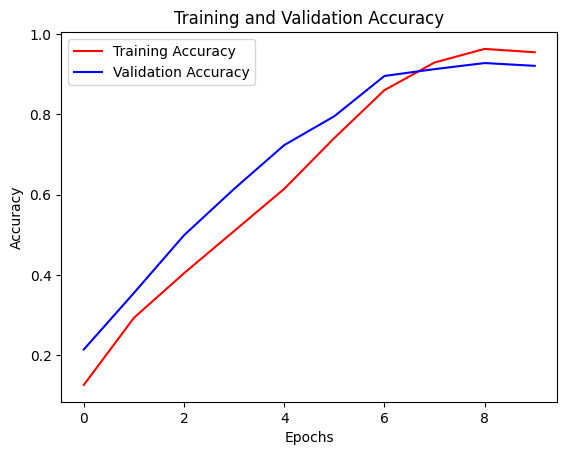

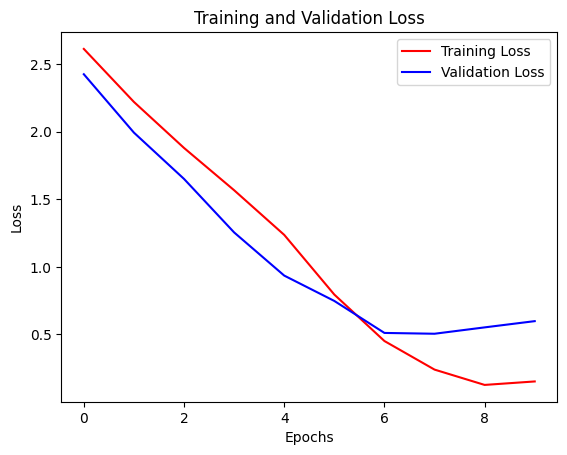

In [ ]:
import matplotlib.pyplot as plt

# Ambil akurasi dan loss dari history model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ambil jumlah epoch
epochs = range(len(acc))

# Plot grafik akurasi
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot grafik loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

# Save the entire model as a SavedModel
tf.saved_model.save(model, 'saved_model/my_model')


In [ ]:
import zipfile
import os

# Kompress direktori saved_model menjadi file zip
zip_file_path = '/content/saved_model.zip'
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk('/content/saved_model'):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), '/content/saved_model'))

# Unduh file zip
from google.colab import files
files.download(zip_file_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model

# Simpan model ke file HDF5
model.save('my_model.h5')

# Load model dari file HDF5
loaded_model = load_model('my_model.h5')


In [ ]:
from google.colab import files

# Mengunduh file model HDF5
files.download('my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
import os
import tensorflow as tf
from sklearn import preprocessing

# Get labels
labels = []
for name in os.listdir(source_path):
  if os.path.isdir(os.path.join(source_path, name)):
    labels.append(str(name))

# Encode labels
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)
num_classes = len(le.classes_)
Y = tf.keras.utils.to_categorical(Y, num_classes=num_classes)



In [ ]:
import numpy as np

def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

# Contoh penggunaan
y_true = [0, 1, 0, 1, 2, 2]
y_pred = [0, 1, 1, 1, 2, 0]
num_classes = 3

cm = confusion_matrix(y_true, y_pred, num_classes)
print(cm)


[[1 1 0]
 [0 2 0]
 [1 0 1]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def generate_classification_report(y_true, y_pred, num_classes):
    target_names = [f'Class {i}' for i in range(num_classes)]
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average=None)

    report = {'class': target_names, 'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}
    return report

y_true = [0, 1, 0, 1, 2, 2]
y_pred = [0, 1, 1, 1, 2, 0]
num_classes = 3

classification_report = generate_classification_report(y_true, y_pred, num_classes)

# Print the classification report
print('{:<15s}{:<15s}{:<15s}{:<15s}{:<15s}'.format('Class', 'Precision', 'Recall', 'F1-Score', 'Support'))
print('-' * 70)
for i in range(len(classification_report['class'])):
    print('{:<15s}{:<15.4f}{:<15.4f}{:<15.4f}{:<15d}'.format(classification_report['class'][i],
                                                             classification_report['precision'][i],
                                                             classification_report['recall'][i],
                                                             classification_report['f1-score'][i],
                                                             classification_report['support'][i]))


Class          Precision      Recall         F1-Score       Support        
----------------------------------------------------------------------
Class 0        0.5000         0.5000         0.5000         2              
Class 1        0.6667         1.0000         0.8000         2              
Class 2        1.0000         0.5000         0.6667         2              


In [ ]:
import tensorflow as tf

TF_MODEL_FILE_PATH = 'model.tflite' # The path to the saved TensorFlow Lite model

# Create the interpreter
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input and output details
print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'serving_default_conv2d_40_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 15], dtype=int32), 'shape_signature': array([-1, 15], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
signature_list = interpreter.get_signature_list()

# Print the signature list
for signature_name, signature in signature_list.items():
    print("Signature name:", signature_name)
    print("Input names:", signature["inputs"])
    print("Output names:", signature["outputs"])
    print()

Signature name: serving_default
Input names: ['conv2d_40_input']
Output names: ['dense_32']



In [ ]:
import tensorflow as tf


# Get the signature runner
classify_lite = interpreter.get_signature_runner('serving_default')


In [ ]:
# Get the predicted class index
predicted_class_index = y_pred

# Define the class names
class_names = ['alang_alang', 'andong', 'jambu_biji', 'jarong', 'kumis_kucing',
               'kunyit', 'lengkuas', 'lidah_buaya', 'mengkudu', 'pacar_air',
               'saga', 'sambiloto', 'seledri', 'serai', 'sirih']

# Get the predicted class names
predicted_class_names = [class_names[idx] for idx in y_pred]

# Print the predicted class names
for class_name in predicted_class_names:
    print("Predicted class:", class_name)



Predicted class: alang_alang
Predicted class: andong
Predicted class: andong
Predicted class: andong
Predicted class: jambu_biji
Predicted class: alang_alang


In [ ]:
# Model Prediction
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(img_height, img_width))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)

  predictions = model.predict(images)
  score = tf.nn.softmax(predictions[0])

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

Saving images (1).jpeg to images (1) (1).jpeg
1/1 [==============================] - 0s 214ms/step
This image most likely belongs to saga with a 16.11 percent confidence.
